In [12]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')

In [2]:
## Defining the independent variables as angles from 60deg to 360deg converted into radian
x = np.array([i*np.pi/180 for i in range(10, 360, 3)])

np.random.seed(10)

y = np.sin(x) + np.random.normal(0, 0.15, len(x))

In [3]:
data = pd.DataFrame(np.column_stack([x, y]), columns = ['x', 'y'])
data.head()

,x,y
0,0.174533,0.373386
1,0.226893,0.332243
2,0.279253,0.043827
3,0.331613,0.324311
4,0.383972,0.467807


In [4]:
## Plynomial regression with power of x from 1 to 15
for i in range(2, 16):
    colname = 'x_%d'%i
    data[colname] = data['x']**i

data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


> Splitting Train Test

In [5]:
## Creating the new attribute with random entries from 1 to 5
data['randnumcol'] = np.random.randint(1, 6, data.shape[0])
data

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,randnumcol
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12,5
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10,5
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09,1
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08,3
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,6.038839,0.118727,36.467579,220.221846,1329.884320,8030.957580,48497.661540,292869.580196,1.768592e+06,1.068024e+07,6.449628e+07,3.894827e+08,2.352023e+09,1.420349e+10,8.577259e+10,5.179669e+11,1
113,6.091199,-0.301713,37.102706,225.999971,1376.610818,8385.210563,51075.986946,311114.005180,1.895057e+06,1.154317e+07,7.031176e+07,4.282829e+08,2.608756e+09,1.589045e+10,9.679192e+10,5.895789e+11,4
114,6.143559,-0.186097,37.743317,231.878292,1424.557962,8751.855839,53767.542420,330324.067368,2.029365e+06,1.246753e+07,7.659498e+07,4.705658e+08,2.890949e+09,1.776071e+10,1.091140e+11,6.703482e+11,1
115,6.195919,-0.139488,38.389410,237.857671,1473.746825,9131.215728,56576.271600,350541.987362,2.171930e+06,1.345710e+07,8.337910e+07,5.166101e+08,3.200875e+09,1.983236e+10,1.228797e+11,7.613526e+11,2


In [6]:
## Include those observations in the train whose value in the randnumcol <= 3
## Include those observations in the test whose value in the randnumcol > 3

train = data[data['randnumcol']<=3]
test = data[data['randnumcol']>3]
train.drop('randnumcol', axis = 1, inplace = True)
test.drop('randnumcol', axis = 1, inplace = True)

In [7]:
print(train.shape)
print(test.shape)

(73, 16)
(44, 16)


> Dependent / Inpdependent Train Test

In [8]:
X_train = train.drop('y', axis = 1)
y_train = train['y'].values

X_test = test.drop('y', axis = 1)
y_test = test['y'].values

> Linear Regression with 1 Feature

Training Error :  -0.33549395682654864
Testing Error  :  0.18974033118165387


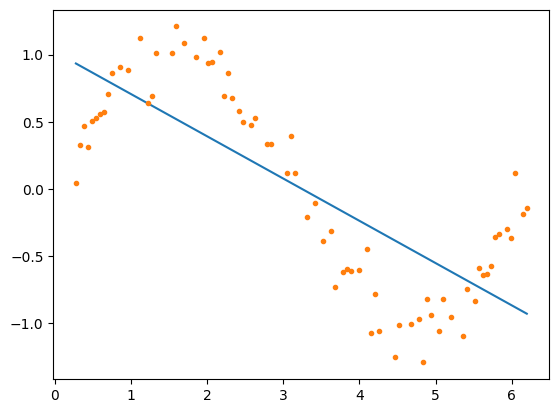

In [16]:
## Train
ind_var_train = X_train.iloc[:, 0:1]

linreg = LinearRegression(normalize=True)
linreg.fit(ind_var_train, y_train)
y_train_pred = linreg.predict(ind_var_train)

rss_train = sum((y_train_pred - y_train_pred**2)/ X_train.shape[0])

## Test

ind_var_test = X_test.iloc[:, 0:1]

y_test_pred = linreg.predict(ind_var_test)
rss_test = sum((y_test_pred - y_test)**2 / X_test.shape[0])

print("Training Error : ", rss_train)
print("Testing Error  : ", rss_test)

plt.plot(X_train.iloc[:, 0:1], y_train_pred)
plt.plot(X_train.iloc[:, 0:1], y_train, '.')
plt.show()

> Linear Regression with 3 Features

Training Error :  0.021472481770965668
Testing Error  :  0.030451878881968986


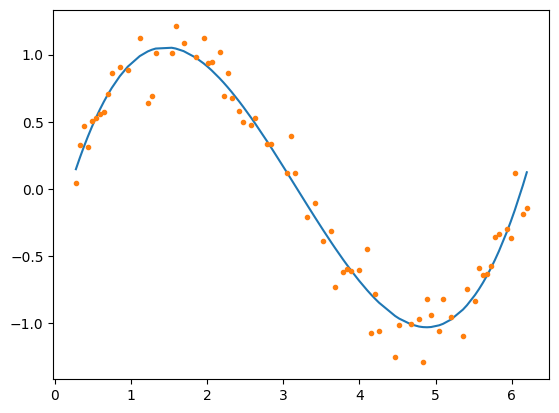

In [19]:
ind_var_train = X_train.iloc[:, 0:3]

linreg = LinearRegression(normalize=True)
linreg.fit(ind_var_train, y_train)
y_train_pred = linreg.predict(ind_var_train)
rss_train = sum((y_train_pred - y_train)**2 / X_train.shape[0])

ind_var_test = X_test.iloc[:, 0:3]
y_test_pred = linreg.predict(ind_var_test)
rss_test = sum((y_test_pred - y_test)**2 / X_test.shape[0])

print("Training Error : ", rss_train)
print("Testing Error  : ", rss_test)

plt.plot(X_train.iloc[:, 0:1], y_train_pred)
plt.plot(X_train.iloc[:, 0:1], y_train, '.')
plt.show()